C:\Users\kevin\AppData\Local\Temp\ipykernel_41356\2011641319.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv', dtype={'host name':str})


{'central': 25, 'cosy': 0, 'sunny': 34, 'retreat': 5, 'safe': 0, 'lower': 2, 'studio': 48, 'modern': 2, 'large': 0, 'tidy': 0}


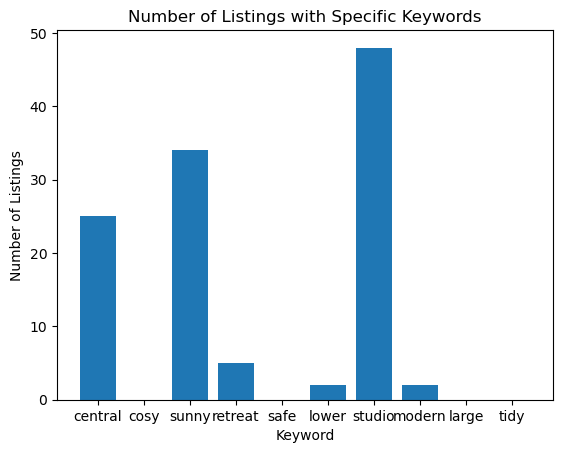

In [28]:
#Task 1 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in the dataset and specify the data type of the 'host name' column 
df = pd.read_csv('Airbnb_Open_Data.csv', dtype={'host name':str})

def count_keyword(keyword):
    df['host name'] = df['host name'].fillna('')
    return df.loc[df['host name'].str.contains(keyword, case=False)]['id'].count()

keywords = ['central', 'cosy', 'sunny', 'retreat', 'safe', 'lower', 'studio', 'modern', 'large', 'tidy']
keyword_counts = {}

for keyword in keywords:
    keyword_counts[keyword] = count_keyword(keyword)
    
print(keyword_counts)

plt.bar(keyword_counts.keys(), keyword_counts.values())
plt.xlabel('Keyword')
plt.ylabel('Number of Listings')
plt.title('Number of Listings with Specific Keywords')
plt.show()



In [12]:
#Task 2.
# convert 'room type' to numerical values
df['room_type_num'] = df['room type'].map({'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3})

# save the updated dataset
df.to_csv('Airbnb_Open_Data_updated.csv', index=False)

# verify the result
print(df['room type'].unique())

[2 1 3 4]


In [13]:
#Task 3.
# remove records with neighbourhood group of Bronx or Queens
df = df[(df['neighbourhood'] != 'Bronx') & (df['neighbourhood'] != 'Queens')]

# save the updated dataset back to the original file
df.to_csv('Airbnb_Open_Data_updated.csv', index=False)


In [14]:
#Task 4.
# remove all rows with missing data
df = df.dropna()

# save the cleaned data back to the original file
df.to_csv('Airbnb_Open_Data_updated.csv', index=False)

In [17]:
# An error was occuring for task 5 - needed to reset index
df = df.reset_index(drop=True)


In [22]:
# Task 5.
# create a new column 'review_category' and assign values based on the number of reviews
df['review_category'] = pd.cut(df['number of reviews'], 
                               bins=[-1, 0, 50, 100, 200, np.inf], 
                               labels=['Poor', 'Low popular', 'Moderate popular', 'Very popular', 'Excellent'])
print(df.head())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... minimum nights number of reviews  \
0  40.64749 -73.97237  Uni

In [41]:
# Task 6.
# Filter the dataframe to only include rows where Construction year is between 2010 and 2020
filtered_df = df[(df['Construction year'] >= 2010) & (df['Construction year'] <= 2020)]

# Remove dollar sign from 'price' column
filtered_df['price'] = filtered_df['price'].str.replace('$', '')

# Remove commas from the 'price' column
filtered_df['price'] = filtered_df['price'].str.replace(',', '')

# Convert the 'price' column to a numeric type
filtered_df['price'] = pd.to_numeric(filtered_df['price'])


# Calculate the average price of the filtered rows
average_price = filtered_df['price'].mean()

# Print the result
print(f"The average price for a listing that was constructed between 2010 and 2020 inclusive is ${average_price:.2f}")

# warnings are noted for not using the .loc accessor, but I couldn't get the code to work using it.

The average price for a listing that was constructed between 2010 and 2020 inclusive is $623.29


C:\Users\kevin\AppData\Local\Temp\ipykernel_41356\1301057837.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_df['price'] = filtered_df['price'].str.replace('$', '')
C:\Users\kevin\AppData\Local\Temp\ipykernel_41356\1301057837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price'] = filtered_df['price'].str.replace('$', '')
C:\Users\kevin\AppData\Local\Temp\ipykernel_41356\1301057837.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [52]:
#Task 7.
from math import radians, sin, cos, sqrt, atan2

# Define the latitude and longitude of the Empire State Building
empire_lat, empire_lon = 40.748817, -73.985428

# Calculate the distance from each listing to the Empire State Building using the haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    a = sin(dLat / 2) * sin(dLat / 2) + cos(radians(lat1)) \
        * cos(radians(lat2)) * sin(dLon / 2) * sin(dLon / 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c  # Distance in km
    return distance

filtered_df['distance_to_empire'] = filtered_df.apply(lambda x: haversine(x['lat'], x['long'], empire_lat, empire_lon), axis=1)
print(filtered_df['distance_to_empire'].head())

0     11.320698
5      0.887661
6      7.321180
9      6.085313
13     8.956407
Name: distance_to_empire, dtype: float64


C:\Users\kevin\AppData\Local\Temp\ipykernel_41356\201363644.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['distance_to_empire'] = filtered_df.apply(lambda x: haversine(x['lat'], x['long'], empire_lat, empire_lon), axis=1)


In [53]:
#Task 8.
#Group listings by neighnourhood and find the median rating number for each
median_rating = df.groupby('neighbourhood')['review rate number'].median()
print(median_rating)


neighbourhood
Allerton           3.5
Arden Heights      4.0
Arrochar           4.0
Arverne            3.0
Astoria            3.0
                  ... 
Windsor Terrace    3.0
Woodhaven          3.0
Woodlawn           3.0
Woodrow            5.0
Woodside           3.0
Name: review rate number, Length: 224, dtype: float64
